<a href="https://colab.research.google.com/github/kamangirkhan/Data110/blob/main/ArashNateghian_week5_data110_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import seaborn as sns
import pandas as pd
import numpy as np

titanic = sns.load_dataset('titanic')

titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


### Part 1: Understanding the Dataset
1. **Task 1: Dataset Overview**  
   - Briefly describe the Titanic dataset. What kind of information is contained in each column?
   **Deliverable*: Write a paragraph summarizing the dataset based on your exploration.

1. survived: Binary indicator (0 = No, 1 = Yes) showing whether the passenger survived.
2. pclass: Passenger class (1 = First, 2 = Second, 3 = Third), representing socioeconomic status.
3. sex: Passenger's gender (male or female).
4. age: Passenger’s age in years.
5. sibsp: Number of siblings or spouses aboard the Titanic.
6. parch: Number of parents or children aboard.
7. fare: The ticket fare paid by the passenger.
8. embarked: Port where the passenger boarded (C = Cherbourg, Q = Queenstown, S = Southampton).
9. class: Text version of pclass (First, Second, Third).
10. who: Classification of the passenger as man, woman, or child.
11. adult_male: Boolean (True/False) indicating if the passenger is an adult male.
12. deck: The deck on which the passenger's cabin was located.
13. embark_town: Full name of the embarkation port (Cherbourg, Queenstown, Southampton).
14. alive: Text version of survived (yes or no).
15. alone: Boolean (True/False) indicating whether the passenger had no relatives aboard (sibsp and parch both 0).

### Part 2: Fare and Survival Analysis
2. **Task 2: Fare Distribution**  
   - Plot a histogram and KDE for the distribution of fares paid by passengers.  
   **Question*: What trends or outliers do you observe in the fare distribution? How might fare impact survival rates?

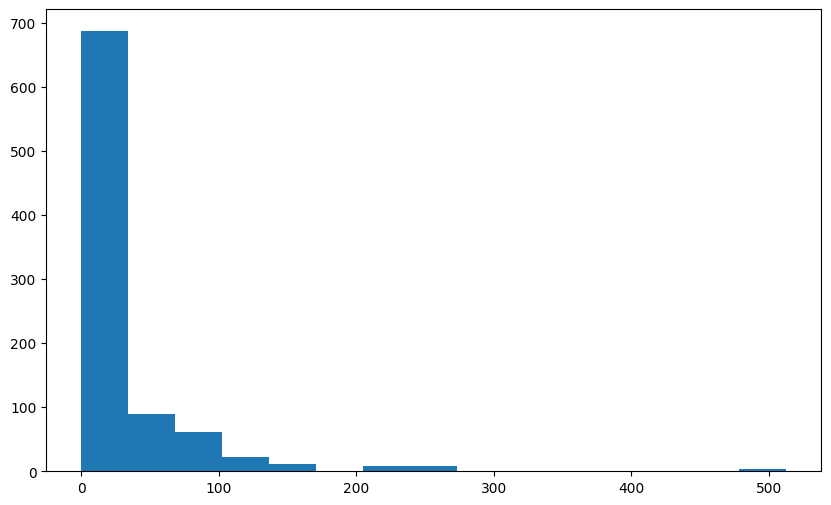

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.hist(titanic['fare'], bins=15)
plt.show()

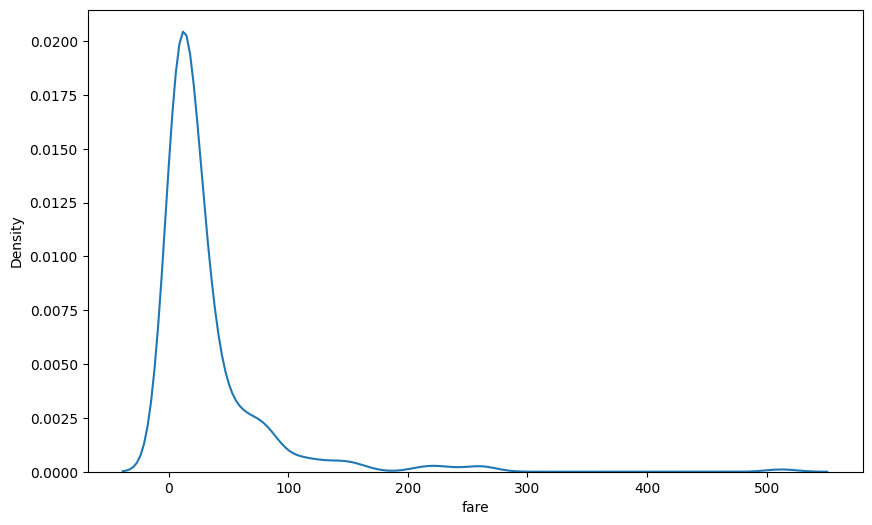

In [ ]:
plt.figure(figsize=(10, 6))
sns.kdeplot(titanic['fare'])
plt.show()

1. Right-Skewed Distribution:

- The majority of passengers paid low fares (under $50),(third-class tickets).

- A small number of passengers paid extremely high fares, (first-class luxury cabins).

2. Outliers in the Fare Data

- A few passengers paid over $500, which is significantly higher than the median fare.
- These high fares likely represent first-class passengers.

3. **Task 3: Fare and Survival Rates**  
   - Create a KDE plot to compare the fare distributions for survivors and non-survivors.  
   **Question*: Does fare seem to have influenced survival? What do the distributions suggest about socioeconomic status and survival?

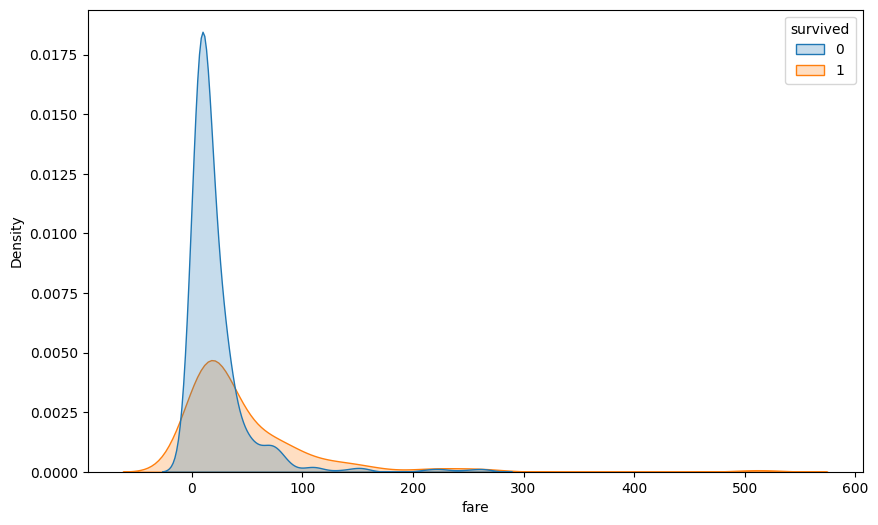

In [ ]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=titanic, x='fare', hue='survived', fill=True)
plt.show()

- Yes, in the Titanic dataset, fare does seem to have influenced survival. Higher fares are generally associated with a higher probability of survival.
- Wealthier passengers had better access to lifeboats due to their location on the ship (closer to the decks where lifeboats were launched).
- Poorer passengers in Third Class were more vulnerable due to physical barriers and social class divisions.

### Part 3: Class, Fare, and Survival Insights
4. **Task 4: Passenger Class, Fare, and Survival**  
   - Create histograms and KDE plots to compare fare distributions across different passenger classes (`Pclass`) and analyze survival rates for each class.  
   **Question*: What patterns do you observe in fare distribution and survival rates across different classes? How does this reflect the socioeconomic divisions on the Titanic?

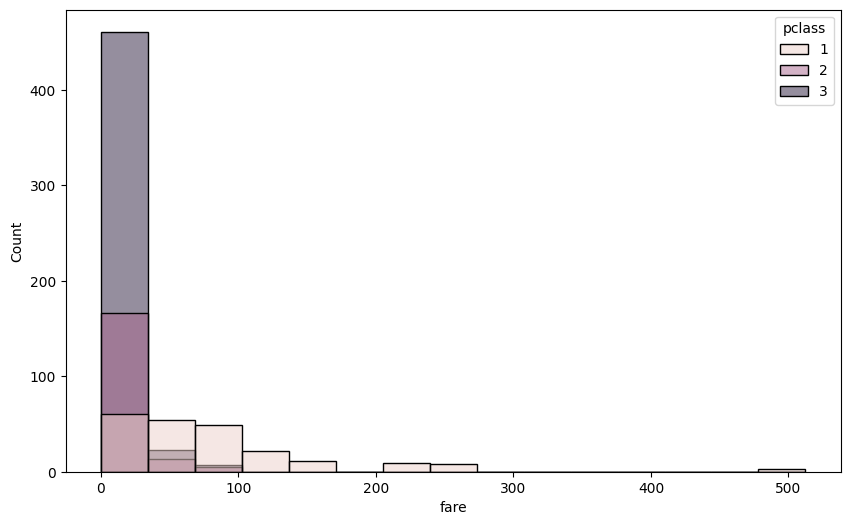

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=titanic, x='fare', hue='pclass', bins=15, fill=True)
plt.show()

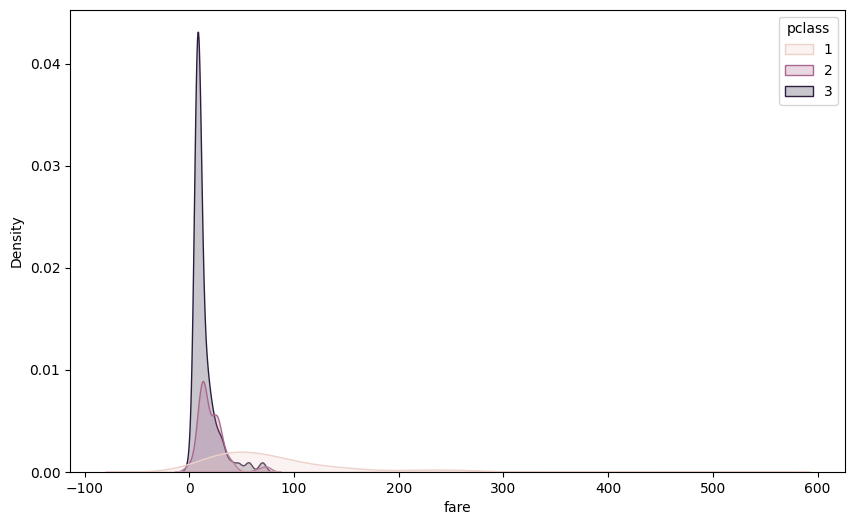

In [ ]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=titanic, x='fare', hue='pclass', fill=True)
plt.show()

- Most of the 3rd class passengers are between 0-15
- Wealthier passengers had better access to lifeboats due to their location on the ship (closer to the decks where lifeboats were launched).
- Poorer passengers in Third Class were more vulnerable due to physical barriers and social class divisions.

### Part 4: Age and Survival
5. **Task 5: Age of Survivors and Non-Survivors**  
   - Create KDE plots to compare the age distributions of survivors and non-survivors.  
   **Question*: What trends do you notice in the age distribution of survivors compared to those who did not survive? How might age have impacted survival rates?

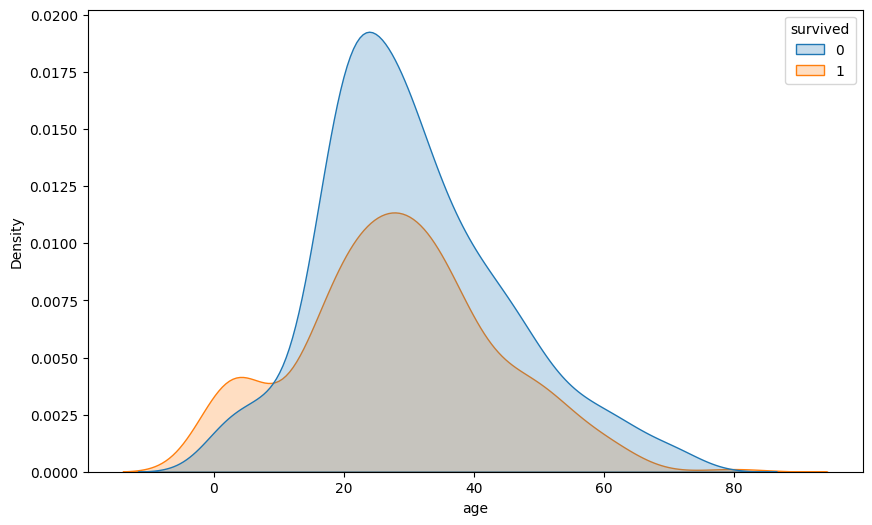

In [ ]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=titanic, x='age', hue='survived', fill=True)
plt.show()

- Children mostly survived, indicating they were given priority.  
- It seems that above the age of 15, survival chances did not significantly change.

6. **Task 6: Pyramid Histogram for Age Survival by Sex**  
   - Create a **pyramid-style histogram** (also known as a population pyramid) for age, showing survival data split by sex. If possible, attempt to find or create one.  
   **Question*: What can you infer from the age and sex distribution in relation to survival rates?

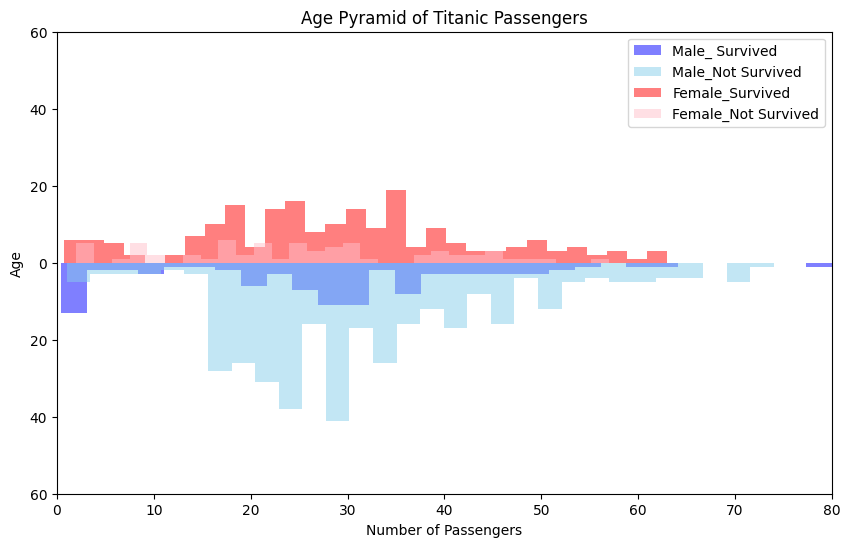

In [ ]:
ages_male_s = titanic[(titanic['sex'] == 'male') & (titanic['survived'] == True)]['age']
ages_male_ns = titanic[(titanic['sex'] == 'male') & (titanic['survived'] == False)]['age']
ages_female_s = titanic[(titanic['sex'] == 'female') & (titanic['survived'] == True)]['age']
ages_female_ns = titanic[(titanic['sex'] == 'female') & (titanic['survived'] == False)]['age']

plt.figure(figsize=(10, 6))
plt.hist(ages_male_s, bins=30, label='Male_ Survived', alpha=0.5, color='blue', orientation='vertical', weights=[-1] * len(ages_male_s))
plt.hist(ages_male_ns, bins=30, label='Male_Not Survived', alpha=0.5, color='skyblue', orientation='vertical', weights=[-1] * len(ages_male_ns))

plt.hist(ages_female_s, bins=30, label='Female_Survived', alpha=0.5, color='red', orientation='vertical')
plt.hist(ages_female_ns, bins=30, label='Female_Not Survived', alpha=0.5, color='pink', orientation='vertical')

plt.xlabel('Number of Passengers')
plt.ylabel('Age')
plt.title('Age Pyramid of Titanic Passengers')

plt.yticks([-60, -40, -20, 0, 20, 40, 60], [60, 40, 20, 0, 20, 40, 60])
plt.xlim(0, 80)

plt.legend()

plt.show()


- Most of the children, regardless of sex, survived.  
- Among middle-aged passengers, more men survived than women.  
- No women over the age of 60 survived.
- Most of the women were survived.